# A Simple Autoencoder

We'll start off by building a simple autoencoder to compress the MNIST dataset. With autoencoders, we pass input data through an encoder that makes a compressed representation of the input. Then, this representation is passed through a decoder to reconstruct the input data. Generally the encoder and decoder will be built with neural networks, then trained on example data.

![Autoencoder](assets/autoencoder_1.png)

In this notebook, we'll be build a simple network architecture for the encoder and decoder. Let's get started by importing our libraries and getting the dataset.

In [1]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', validation_size=0)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


Below I'm plotting an example image from the MNIST dataset. These are 28x28 grayscale images of handwritten digits.

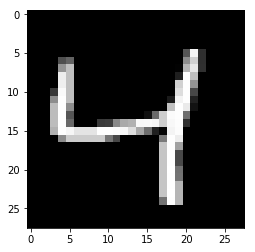

In [10]:
img = mnist.train.images[2]
plt.imshow(img.reshape((28, 28)), cmap='Greys_r')

We'll train an autoencoder with these images by flattening them into 784 length vectors. The images from this dataset are already normalized such that the values are between 0 and 1. Let's start by building basically the simplest autoencoder with a **single ReLU hidden layer**. This layer will be used as the compressed representation. Then, the encoder is the input layer and the hidden layer. The decoder is the hidden layer and the output layer. Since the images are normalized between 0 and 1, we need to use a **sigmoid activation on the output layer** to get values matching the input.

![Autoencoder architecture](assets/simple_autoencoder.png)


> **Exercise:** Build the graph for the autoencoder in the cell below. The input images will be flattened into 784 length vectors. The targets are the same as the inputs. And there should be one hidden layer with a ReLU activation and an output layer with a sigmoid activation. Feel free to use TensorFlow's higher level API, `tf.layers`. For instance, you would use [`tf.layers.dense(inputs, units, activation=tf.nn.relu)`](https://www.tensorflow.org/api_docs/python/tf/layers/dense) to create a fully connected layer with a ReLU activation. The loss should be calculated with the cross-entropy loss, there is a convenient TensorFlow function for this `tf.nn.sigmoid_cross_entropy_with_logits` ([documentation](https://www.tensorflow.org/api_docs/python/tf/nn/sigmoid_cross_entropy_with_logits)). You should note that `tf.nn.sigmoid_cross_entropy_with_logits` takes the logits, but to get the reconstructed images you'll need to pass the logits through the sigmoid function.

In [45]:
# Size of the encoding layer (the hidden layer)
encoding_dim = 32 # feel free to change this value
unencoded_dim = 784

# Input and target placeholders
inputs_ = tf.placeholder(tf.float32, (None, unencoded_dim))
targets_ = tf.placeholder(tf.float32, (None, unencoded_dim))

# Output of hidden layer, single fully connected layer here with ReLU activation
encoded = tf.layers.dense(inputs_, encoding_dim, activation=tf.nn.relu)

# Output layer logits, fully connected layer with no activation
logits =  tf.layers.dense(encoded, unencoded_dim)
# Sigmoid output from logits
decoded = tf.sigmoid(logits)

# Sigmoid cross-entropy loss
loss = tf.nn.sigmoid_cross_entropy_with_logits(logits=logits, labels=targets_)
# Mean of the loss
cost = tf.reduce_mean(loss)

# Adam optimizer
opt = tf.train.AdamOptimizer().minimize(cost)

## Training

In [46]:
# Create the session
sess = tf.Session()

Here I'll write a bit of code to train the network. I'm not too interested in validation here, so I'll just monitor the training loss. 

Calling `mnist.train.next_batch(batch_size)` will return a tuple of `(images, labels)`. We're not concerned with the labels here, we just need the images. Otherwise this is pretty straightfoward training with TensorFlow. We initialize the variables with `sess.run(tf.global_variables_initializer())`. Then, run the optimizer and get the loss with `batch_cost, _ = sess.run([cost, opt], feed_dict=feed)`.

In [47]:
epochs = 20
batch_size = 200
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        feed = {inputs_: batch[0], targets_: batch[0]}
        batch_cost, _ = sess.run([cost, opt], feed_dict=feed)

        print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/20... Training loss: 0.6950
Epoch: 1/20... Training loss: 0.6914
Epoch: 1/20... Training loss: 0.6880
Epoch: 1/20... Training loss: 0.6843
Epoch: 1/20... Training loss: 0.6803
Epoch: 1/20... Training loss: 0.6752
Epoch: 1/20... Training loss: 0.6697
Epoch: 1/20... Training loss: 0.6634
Epoch: 1/20... Training loss: 0.6547
Epoch: 1/20... Training loss: 0.6464
Epoch: 1/20... Training loss: 0.6363
Epoch: 1/20... Training loss: 0.6256
Epoch: 1/20... Training loss: 0.6114
Epoch: 1/20... Training loss: 0.5986
Epoch: 1/20... Training loss: 0.5829
Epoch: 1/20... Training loss: 0.5655
Epoch: 1/20... Training loss: 0.5465
Epoch: 1/20... Training loss: 0.5303
Epoch: 1/20... Training loss: 0.5123
Epoch: 1/20... Training loss: 0.4947
Epoch: 1/20... Training loss: 0.4773
Epoch: 1/20... Training loss: 0.4576
Epoch: 1/20... Training loss: 0.4432
Epoch: 1/20... Training loss: 0.4255
Epoch: 1/20... Training loss: 0.4117
Epoch: 1/20... Training loss: 0.3964
Epoch: 1/20... Training loss: 0.3831
E

Epoch: 1/20... Training loss: 0.1947
Epoch: 1/20... Training loss: 0.1953
Epoch: 1/20... Training loss: 0.1964
Epoch: 1/20... Training loss: 0.1895
Epoch: 1/20... Training loss: 0.1907
Epoch: 1/20... Training loss: 0.1961
Epoch: 1/20... Training loss: 0.1896
Epoch: 1/20... Training loss: 0.1914
Epoch: 1/20... Training loss: 0.1903
Epoch: 1/20... Training loss: 0.1952
Epoch: 1/20... Training loss: 0.1891
Epoch: 1/20... Training loss: 0.1879
Epoch: 1/20... Training loss: 0.1921
Epoch: 1/20... Training loss: 0.1852
Epoch: 1/20... Training loss: 0.1886
Epoch: 1/20... Training loss: 0.1912
Epoch: 1/20... Training loss: 0.1873
Epoch: 1/20... Training loss: 0.1903
Epoch: 1/20... Training loss: 0.1919
Epoch: 1/20... Training loss: 0.1884
Epoch: 1/20... Training loss: 0.2015
Epoch: 1/20... Training loss: 0.1868
Epoch: 1/20... Training loss: 0.1852
Epoch: 1/20... Training loss: 0.1887
Epoch: 1/20... Training loss: 0.1907
Epoch: 1/20... Training loss: 0.1910
Epoch: 1/20... Training loss: 0.1856
E

Epoch: 2/20... Training loss: 0.1589
Epoch: 2/20... Training loss: 0.1631
Epoch: 2/20... Training loss: 0.1573
Epoch: 2/20... Training loss: 0.1625
Epoch: 2/20... Training loss: 0.1609
Epoch: 2/20... Training loss: 0.1595
Epoch: 2/20... Training loss: 0.1554
Epoch: 2/20... Training loss: 0.1617
Epoch: 2/20... Training loss: 0.1569
Epoch: 2/20... Training loss: 0.1566
Epoch: 2/20... Training loss: 0.1558
Epoch: 2/20... Training loss: 0.1608
Epoch: 2/20... Training loss: 0.1548
Epoch: 2/20... Training loss: 0.1626
Epoch: 2/20... Training loss: 0.1636
Epoch: 2/20... Training loss: 0.1535
Epoch: 2/20... Training loss: 0.1563
Epoch: 2/20... Training loss: 0.1565
Epoch: 2/20... Training loss: 0.1456
Epoch: 2/20... Training loss: 0.1586
Epoch: 2/20... Training loss: 0.1574
Epoch: 2/20... Training loss: 0.1601
Epoch: 2/20... Training loss: 0.1493
Epoch: 2/20... Training loss: 0.1630
Epoch: 2/20... Training loss: 0.1564
Epoch: 2/20... Training loss: 0.1508
Epoch: 2/20... Training loss: 0.1550
E

Epoch: 3/20... Training loss: 0.1405
Epoch: 3/20... Training loss: 0.1376
Epoch: 3/20... Training loss: 0.1378
Epoch: 3/20... Training loss: 0.1410
Epoch: 3/20... Training loss: 0.1409
Epoch: 3/20... Training loss: 0.1366
Epoch: 3/20... Training loss: 0.1445
Epoch: 3/20... Training loss: 0.1394
Epoch: 3/20... Training loss: 0.1366
Epoch: 3/20... Training loss: 0.1411
Epoch: 3/20... Training loss: 0.1378
Epoch: 3/20... Training loss: 0.1411
Epoch: 3/20... Training loss: 0.1374
Epoch: 3/20... Training loss: 0.1333
Epoch: 3/20... Training loss: 0.1415
Epoch: 3/20... Training loss: 0.1366
Epoch: 3/20... Training loss: 0.1353
Epoch: 3/20... Training loss: 0.1373
Epoch: 3/20... Training loss: 0.1329
Epoch: 3/20... Training loss: 0.1337
Epoch: 3/20... Training loss: 0.1373
Epoch: 3/20... Training loss: 0.1355
Epoch: 3/20... Training loss: 0.1420
Epoch: 3/20... Training loss: 0.1388
Epoch: 3/20... Training loss: 0.1406
Epoch: 3/20... Training loss: 0.1341
Epoch: 3/20... Training loss: 0.1348
E

Epoch: 4/20... Training loss: 0.1264
Epoch: 4/20... Training loss: 0.1269
Epoch: 4/20... Training loss: 0.1279
Epoch: 4/20... Training loss: 0.1225
Epoch: 4/20... Training loss: 0.1274
Epoch: 4/20... Training loss: 0.1236
Epoch: 4/20... Training loss: 0.1280
Epoch: 4/20... Training loss: 0.1290
Epoch: 4/20... Training loss: 0.1275
Epoch: 4/20... Training loss: 0.1287
Epoch: 4/20... Training loss: 0.1286
Epoch: 4/20... Training loss: 0.1282
Epoch: 4/20... Training loss: 0.1247
Epoch: 4/20... Training loss: 0.1240
Epoch: 4/20... Training loss: 0.1288
Epoch: 4/20... Training loss: 0.1239
Epoch: 4/20... Training loss: 0.1279
Epoch: 4/20... Training loss: 0.1229
Epoch: 4/20... Training loss: 0.1241
Epoch: 4/20... Training loss: 0.1256
Epoch: 4/20... Training loss: 0.1205
Epoch: 4/20... Training loss: 0.1236
Epoch: 4/20... Training loss: 0.1261
Epoch: 4/20... Training loss: 0.1250
Epoch: 4/20... Training loss: 0.1284
Epoch: 4/20... Training loss: 0.1286
Epoch: 4/20... Training loss: 0.1278
E

Epoch: 4/20... Training loss: 0.1150
Epoch: 4/20... Training loss: 0.1143
Epoch: 4/20... Training loss: 0.1163
Epoch: 4/20... Training loss: 0.1177
Epoch: 4/20... Training loss: 0.1150
Epoch: 4/20... Training loss: 0.1176
Epoch: 4/20... Training loss: 0.1241
Epoch: 4/20... Training loss: 0.1137
Epoch: 4/20... Training loss: 0.1190
Epoch: 4/20... Training loss: 0.1172
Epoch: 4/20... Training loss: 0.1170
Epoch: 4/20... Training loss: 0.1156
Epoch: 4/20... Training loss: 0.1172
Epoch: 4/20... Training loss: 0.1147
Epoch: 4/20... Training loss: 0.1159
Epoch: 4/20... Training loss: 0.1204
Epoch: 4/20... Training loss: 0.1152
Epoch: 4/20... Training loss: 0.1226
Epoch: 4/20... Training loss: 0.1174
Epoch: 4/20... Training loss: 0.1188
Epoch: 4/20... Training loss: 0.1214
Epoch: 4/20... Training loss: 0.1169
Epoch: 4/20... Training loss: 0.1183
Epoch: 4/20... Training loss: 0.1151
Epoch: 4/20... Training loss: 0.1188
Epoch: 4/20... Training loss: 0.1093
Epoch: 4/20... Training loss: 0.1159
E

Epoch: 5/20... Training loss: 0.1084
Epoch: 5/20... Training loss: 0.1102
Epoch: 5/20... Training loss: 0.1098
Epoch: 5/20... Training loss: 0.1113
Epoch: 5/20... Training loss: 0.1102
Epoch: 5/20... Training loss: 0.1047
Epoch: 5/20... Training loss: 0.1119
Epoch: 5/20... Training loss: 0.1110
Epoch: 5/20... Training loss: 0.1117
Epoch: 5/20... Training loss: 0.1114
Epoch: 5/20... Training loss: 0.1091
Epoch: 5/20... Training loss: 0.1100
Epoch: 5/20... Training loss: 0.1092
Epoch: 5/20... Training loss: 0.1119
Epoch: 5/20... Training loss: 0.1100
Epoch: 5/20... Training loss: 0.1133
Epoch: 5/20... Training loss: 0.1119
Epoch: 5/20... Training loss: 0.1075
Epoch: 5/20... Training loss: 0.1080
Epoch: 5/20... Training loss: 0.1150
Epoch: 5/20... Training loss: 0.1088
Epoch: 5/20... Training loss: 0.1057
Epoch: 5/20... Training loss: 0.1097
Epoch: 5/20... Training loss: 0.1087
Epoch: 5/20... Training loss: 0.1067
Epoch: 5/20... Training loss: 0.1066
Epoch: 5/20... Training loss: 0.1138
E

Epoch: 6/20... Training loss: 0.1025
Epoch: 6/20... Training loss: 0.1044
Epoch: 6/20... Training loss: 0.1066
Epoch: 6/20... Training loss: 0.1038
Epoch: 6/20... Training loss: 0.1020
Epoch: 6/20... Training loss: 0.1066
Epoch: 6/20... Training loss: 0.1052
Epoch: 6/20... Training loss: 0.1095
Epoch: 6/20... Training loss: 0.1083
Epoch: 6/20... Training loss: 0.1065
Epoch: 6/20... Training loss: 0.1028
Epoch: 6/20... Training loss: 0.1064
Epoch: 6/20... Training loss: 0.1077
Epoch: 6/20... Training loss: 0.1036
Epoch: 6/20... Training loss: 0.1053
Epoch: 6/20... Training loss: 0.1063
Epoch: 6/20... Training loss: 0.1042
Epoch: 6/20... Training loss: 0.1069
Epoch: 6/20... Training loss: 0.1058
Epoch: 6/20... Training loss: 0.1085
Epoch: 6/20... Training loss: 0.1025
Epoch: 6/20... Training loss: 0.1029
Epoch: 6/20... Training loss: 0.1036
Epoch: 6/20... Training loss: 0.1018
Epoch: 6/20... Training loss: 0.1045
Epoch: 6/20... Training loss: 0.1048
Epoch: 6/20... Training loss: 0.1066
E

Epoch: 7/20... Training loss: 0.1004
Epoch: 7/20... Training loss: 0.1030
Epoch: 7/20... Training loss: 0.1029
Epoch: 7/20... Training loss: 0.1072
Epoch: 7/20... Training loss: 0.1032
Epoch: 7/20... Training loss: 0.1039
Epoch: 7/20... Training loss: 0.1018
Epoch: 7/20... Training loss: 0.1040
Epoch: 7/20... Training loss: 0.0987
Epoch: 7/20... Training loss: 0.1033
Epoch: 7/20... Training loss: 0.1015
Epoch: 7/20... Training loss: 0.0977
Epoch: 7/20... Training loss: 0.1004
Epoch: 7/20... Training loss: 0.1013
Epoch: 7/20... Training loss: 0.1031
Epoch: 7/20... Training loss: 0.1008
Epoch: 7/20... Training loss: 0.0987
Epoch: 7/20... Training loss: 0.0996
Epoch: 7/20... Training loss: 0.1001
Epoch: 7/20... Training loss: 0.1018
Epoch: 7/20... Training loss: 0.1036
Epoch: 7/20... Training loss: 0.1024
Epoch: 7/20... Training loss: 0.1042
Epoch: 7/20... Training loss: 0.1014
Epoch: 7/20... Training loss: 0.1021
Epoch: 7/20... Training loss: 0.1008
Epoch: 7/20... Training loss: 0.1030
E

Epoch: 7/20... Training loss: 0.0996
Epoch: 7/20... Training loss: 0.0983
Epoch: 7/20... Training loss: 0.1012
Epoch: 7/20... Training loss: 0.1011
Epoch: 7/20... Training loss: 0.0980
Epoch: 7/20... Training loss: 0.1009
Epoch: 7/20... Training loss: 0.1017
Epoch: 7/20... Training loss: 0.0995
Epoch: 7/20... Training loss: 0.0990
Epoch: 7/20... Training loss: 0.0981
Epoch: 7/20... Training loss: 0.0961
Epoch: 7/20... Training loss: 0.0997
Epoch: 7/20... Training loss: 0.0955
Epoch: 7/20... Training loss: 0.0991
Epoch: 7/20... Training loss: 0.0991
Epoch: 7/20... Training loss: 0.0967
Epoch: 7/20... Training loss: 0.0991
Epoch: 7/20... Training loss: 0.0964
Epoch: 7/20... Training loss: 0.1027
Epoch: 7/20... Training loss: 0.0999
Epoch: 7/20... Training loss: 0.1024
Epoch: 7/20... Training loss: 0.1024
Epoch: 7/20... Training loss: 0.0980
Epoch: 7/20... Training loss: 0.0992
Epoch: 7/20... Training loss: 0.0992
Epoch: 7/20... Training loss: 0.0983
Epoch: 7/20... Training loss: 0.1003
E

Epoch: 8/20... Training loss: 0.1000
Epoch: 8/20... Training loss: 0.0966
Epoch: 8/20... Training loss: 0.0977
Epoch: 8/20... Training loss: 0.0960
Epoch: 8/20... Training loss: 0.0969
Epoch: 8/20... Training loss: 0.0970
Epoch: 8/20... Training loss: 0.0975
Epoch: 8/20... Training loss: 0.1002
Epoch: 8/20... Training loss: 0.0984
Epoch: 8/20... Training loss: 0.0994
Epoch: 8/20... Training loss: 0.0960
Epoch: 8/20... Training loss: 0.0959
Epoch: 8/20... Training loss: 0.0980
Epoch: 8/20... Training loss: 0.1012
Epoch: 8/20... Training loss: 0.1007
Epoch: 8/20... Training loss: 0.1004
Epoch: 8/20... Training loss: 0.0970
Epoch: 8/20... Training loss: 0.1009
Epoch: 8/20... Training loss: 0.0983
Epoch: 8/20... Training loss: 0.0992
Epoch: 8/20... Training loss: 0.1041
Epoch: 8/20... Training loss: 0.0968
Epoch: 8/20... Training loss: 0.0962
Epoch: 8/20... Training loss: 0.0962
Epoch: 8/20... Training loss: 0.0967
Epoch: 8/20... Training loss: 0.0965
Epoch: 8/20... Training loss: 0.0934
E

Epoch: 9/20... Training loss: 0.0940
Epoch: 9/20... Training loss: 0.0926
Epoch: 9/20... Training loss: 0.0946
Epoch: 9/20... Training loss: 0.0945
Epoch: 9/20... Training loss: 0.0955
Epoch: 9/20... Training loss: 0.0976
Epoch: 9/20... Training loss: 0.0979
Epoch: 9/20... Training loss: 0.0972
Epoch: 9/20... Training loss: 0.0968
Epoch: 9/20... Training loss: 0.0934
Epoch: 9/20... Training loss: 0.0969
Epoch: 9/20... Training loss: 0.0948
Epoch: 9/20... Training loss: 0.0976
Epoch: 9/20... Training loss: 0.0960
Epoch: 9/20... Training loss: 0.0948
Epoch: 9/20... Training loss: 0.0960
Epoch: 9/20... Training loss: 0.0987
Epoch: 9/20... Training loss: 0.0976
Epoch: 9/20... Training loss: 0.0948
Epoch: 9/20... Training loss: 0.0945
Epoch: 9/20... Training loss: 0.0941
Epoch: 9/20... Training loss: 0.0992
Epoch: 9/20... Training loss: 0.0954
Epoch: 9/20... Training loss: 0.0979
Epoch: 9/20... Training loss: 0.0984
Epoch: 9/20... Training loss: 0.0956
Epoch: 9/20... Training loss: 0.0972
E

Epoch: 10/20... Training loss: 0.0935
Epoch: 10/20... Training loss: 0.0971
Epoch: 10/20... Training loss: 0.0979
Epoch: 10/20... Training loss: 0.0931
Epoch: 10/20... Training loss: 0.0934
Epoch: 10/20... Training loss: 0.0944
Epoch: 10/20... Training loss: 0.0947
Epoch: 10/20... Training loss: 0.0955
Epoch: 10/20... Training loss: 0.0984
Epoch: 10/20... Training loss: 0.0955
Epoch: 10/20... Training loss: 0.0988
Epoch: 10/20... Training loss: 0.0958
Epoch: 10/20... Training loss: 0.0963
Epoch: 10/20... Training loss: 0.0946
Epoch: 10/20... Training loss: 0.0941
Epoch: 10/20... Training loss: 0.0969
Epoch: 10/20... Training loss: 0.0929
Epoch: 10/20... Training loss: 0.0959
Epoch: 10/20... Training loss: 0.0941
Epoch: 10/20... Training loss: 0.0930
Epoch: 10/20... Training loss: 0.0970
Epoch: 10/20... Training loss: 0.0928
Epoch: 10/20... Training loss: 0.0931
Epoch: 10/20... Training loss: 0.0981
Epoch: 10/20... Training loss: 0.0987
Epoch: 10/20... Training loss: 0.0950
Epoch: 10/20

Epoch: 10/20... Training loss: 0.0958
Epoch: 10/20... Training loss: 0.0919
Epoch: 10/20... Training loss: 0.0963
Epoch: 10/20... Training loss: 0.0929
Epoch: 10/20... Training loss: 0.0942
Epoch: 10/20... Training loss: 0.0957
Epoch: 10/20... Training loss: 0.0928
Epoch: 10/20... Training loss: 0.0958
Epoch: 10/20... Training loss: 0.0950
Epoch: 10/20... Training loss: 0.0936
Epoch: 10/20... Training loss: 0.0931
Epoch: 10/20... Training loss: 0.0937
Epoch: 10/20... Training loss: 0.0947
Epoch: 10/20... Training loss: 0.0924
Epoch: 10/20... Training loss: 0.0965
Epoch: 10/20... Training loss: 0.0941
Epoch: 10/20... Training loss: 0.0988
Epoch: 10/20... Training loss: 0.0950
Epoch: 10/20... Training loss: 0.0995
Epoch: 10/20... Training loss: 0.0931
Epoch: 10/20... Training loss: 0.0950
Epoch: 10/20... Training loss: 0.0968
Epoch: 10/20... Training loss: 0.0958
Epoch: 10/20... Training loss: 0.0965
Epoch: 10/20... Training loss: 0.0938
Epoch: 10/20... Training loss: 0.0954
Epoch: 10/20

Epoch: 11/20... Training loss: 0.0947
Epoch: 11/20... Training loss: 0.0955
Epoch: 11/20... Training loss: 0.0957
Epoch: 11/20... Training loss: 0.0958
Epoch: 11/20... Training loss: 0.0954
Epoch: 11/20... Training loss: 0.0907
Epoch: 11/20... Training loss: 0.0939
Epoch: 11/20... Training loss: 0.0951
Epoch: 11/20... Training loss: 0.0964
Epoch: 11/20... Training loss: 0.0997
Epoch: 11/20... Training loss: 0.0944
Epoch: 11/20... Training loss: 0.0916
Epoch: 11/20... Training loss: 0.0944
Epoch: 11/20... Training loss: 0.0955
Epoch: 11/20... Training loss: 0.0938
Epoch: 11/20... Training loss: 0.0986
Epoch: 11/20... Training loss: 0.0921
Epoch: 11/20... Training loss: 0.0948
Epoch: 11/20... Training loss: 0.0970
Epoch: 11/20... Training loss: 0.0926
Epoch: 11/20... Training loss: 0.0944
Epoch: 11/20... Training loss: 0.0949
Epoch: 11/20... Training loss: 0.0961
Epoch: 11/20... Training loss: 0.0926
Epoch: 11/20... Training loss: 0.0950
Epoch: 11/20... Training loss: 0.0928
Epoch: 11/20

Epoch: 12/20... Training loss: 0.0946
Epoch: 12/20... Training loss: 0.0979
Epoch: 12/20... Training loss: 0.0943
Epoch: 12/20... Training loss: 0.0918
Epoch: 12/20... Training loss: 0.0951
Epoch: 12/20... Training loss: 0.0945
Epoch: 12/20... Training loss: 0.0895
Epoch: 12/20... Training loss: 0.0971
Epoch: 12/20... Training loss: 0.0940
Epoch: 12/20... Training loss: 0.0939
Epoch: 12/20... Training loss: 0.0949
Epoch: 12/20... Training loss: 0.0969
Epoch: 12/20... Training loss: 0.0945
Epoch: 12/20... Training loss: 0.0912
Epoch: 12/20... Training loss: 0.0950
Epoch: 12/20... Training loss: 0.0939
Epoch: 12/20... Training loss: 0.0971
Epoch: 12/20... Training loss: 0.0963
Epoch: 12/20... Training loss: 0.0923
Epoch: 12/20... Training loss: 0.0974
Epoch: 12/20... Training loss: 0.0936
Epoch: 12/20... Training loss: 0.0937
Epoch: 12/20... Training loss: 0.0951
Epoch: 12/20... Training loss: 0.0933
Epoch: 12/20... Training loss: 0.0960
Epoch: 12/20... Training loss: 0.0952
Epoch: 12/20

Epoch: 13/20... Training loss: 0.0916
Epoch: 13/20... Training loss: 0.0937
Epoch: 13/20... Training loss: 0.0910
Epoch: 13/20... Training loss: 0.0934
Epoch: 13/20... Training loss: 0.0973
Epoch: 13/20... Training loss: 0.0935
Epoch: 13/20... Training loss: 0.0925
Epoch: 13/20... Training loss: 0.0913
Epoch: 13/20... Training loss: 0.0966
Epoch: 13/20... Training loss: 0.0944
Epoch: 13/20... Training loss: 0.0941
Epoch: 13/20... Training loss: 0.0940
Epoch: 13/20... Training loss: 0.0959
Epoch: 13/20... Training loss: 0.0977
Epoch: 13/20... Training loss: 0.0916
Epoch: 13/20... Training loss: 0.0930
Epoch: 13/20... Training loss: 0.0955
Epoch: 13/20... Training loss: 0.0961
Epoch: 13/20... Training loss: 0.0933
Epoch: 13/20... Training loss: 0.0965
Epoch: 13/20... Training loss: 0.0954
Epoch: 13/20... Training loss: 0.0936
Epoch: 13/20... Training loss: 0.0933
Epoch: 13/20... Training loss: 0.0921
Epoch: 13/20... Training loss: 0.0973
Epoch: 13/20... Training loss: 0.0949
Epoch: 13/20

Epoch: 13/20... Training loss: 0.0959
Epoch: 13/20... Training loss: 0.0947
Epoch: 13/20... Training loss: 0.0958
Epoch: 13/20... Training loss: 0.0982
Epoch: 13/20... Training loss: 0.0954
Epoch: 13/20... Training loss: 0.0908
Epoch: 13/20... Training loss: 0.0962
Epoch: 13/20... Training loss: 0.0917
Epoch: 13/20... Training loss: 0.0945
Epoch: 13/20... Training loss: 0.0981
Epoch: 13/20... Training loss: 0.0917
Epoch: 13/20... Training loss: 0.0959
Epoch: 13/20... Training loss: 0.0924
Epoch: 13/20... Training loss: 0.0914
Epoch: 13/20... Training loss: 0.0943
Epoch: 13/20... Training loss: 0.0958
Epoch: 13/20... Training loss: 0.0921
Epoch: 13/20... Training loss: 0.0928
Epoch: 13/20... Training loss: 0.0942
Epoch: 13/20... Training loss: 0.0928
Epoch: 13/20... Training loss: 0.0930
Epoch: 13/20... Training loss: 0.0949
Epoch: 13/20... Training loss: 0.0955
Epoch: 13/20... Training loss: 0.0907
Epoch: 13/20... Training loss: 0.0924
Epoch: 13/20... Training loss: 0.0927
Epoch: 13/20

Epoch: 14/20... Training loss: 0.0945
Epoch: 14/20... Training loss: 0.0933
Epoch: 14/20... Training loss: 0.0934
Epoch: 14/20... Training loss: 0.0944
Epoch: 14/20... Training loss: 0.0948
Epoch: 14/20... Training loss: 0.0980
Epoch: 14/20... Training loss: 0.0932
Epoch: 14/20... Training loss: 0.0949
Epoch: 14/20... Training loss: 0.0913
Epoch: 14/20... Training loss: 0.0941
Epoch: 14/20... Training loss: 0.0966
Epoch: 14/20... Training loss: 0.0963
Epoch: 14/20... Training loss: 0.0922
Epoch: 14/20... Training loss: 0.0959
Epoch: 14/20... Training loss: 0.0900
Epoch: 14/20... Training loss: 0.0945
Epoch: 14/20... Training loss: 0.0926
Epoch: 14/20... Training loss: 0.0904
Epoch: 14/20... Training loss: 0.0960
Epoch: 14/20... Training loss: 0.0921
Epoch: 14/20... Training loss: 0.0931
Epoch: 14/20... Training loss: 0.0944
Epoch: 14/20... Training loss: 0.0897
Epoch: 14/20... Training loss: 0.0935
Epoch: 14/20... Training loss: 0.0932
Epoch: 14/20... Training loss: 0.0965
Epoch: 14/20

Epoch: 15/20... Training loss: 0.0913
Epoch: 15/20... Training loss: 0.0905
Epoch: 15/20... Training loss: 0.0942
Epoch: 15/20... Training loss: 0.0951
Epoch: 15/20... Training loss: 0.0951
Epoch: 15/20... Training loss: 0.0960
Epoch: 15/20... Training loss: 0.0931
Epoch: 15/20... Training loss: 0.0946
Epoch: 15/20... Training loss: 0.0923
Epoch: 15/20... Training loss: 0.0966
Epoch: 15/20... Training loss: 0.0922
Epoch: 15/20... Training loss: 0.0935
Epoch: 15/20... Training loss: 0.0933
Epoch: 15/20... Training loss: 0.0956
Epoch: 15/20... Training loss: 0.0903
Epoch: 15/20... Training loss: 0.0897
Epoch: 15/20... Training loss: 0.0964
Epoch: 15/20... Training loss: 0.0965
Epoch: 15/20... Training loss: 0.0943
Epoch: 15/20... Training loss: 0.0909
Epoch: 15/20... Training loss: 0.0940
Epoch: 15/20... Training loss: 0.0956
Epoch: 15/20... Training loss: 0.0916
Epoch: 15/20... Training loss: 0.0963
Epoch: 15/20... Training loss: 0.0959
Epoch: 15/20... Training loss: 0.0937
Epoch: 15/20

Epoch: 16/20... Training loss: 0.0917
Epoch: 16/20... Training loss: 0.0923
Epoch: 16/20... Training loss: 0.0909
Epoch: 16/20... Training loss: 0.0957
Epoch: 16/20... Training loss: 0.0966
Epoch: 16/20... Training loss: 0.0922
Epoch: 16/20... Training loss: 0.0934
Epoch: 16/20... Training loss: 0.0925
Epoch: 16/20... Training loss: 0.0894
Epoch: 16/20... Training loss: 0.0937
Epoch: 16/20... Training loss: 0.0905
Epoch: 16/20... Training loss: 0.0916
Epoch: 16/20... Training loss: 0.0919
Epoch: 16/20... Training loss: 0.0933
Epoch: 16/20... Training loss: 0.0931
Epoch: 16/20... Training loss: 0.0897
Epoch: 16/20... Training loss: 0.0934
Epoch: 16/20... Training loss: 0.0948
Epoch: 16/20... Training loss: 0.0883
Epoch: 16/20... Training loss: 0.0928
Epoch: 16/20... Training loss: 0.0964
Epoch: 16/20... Training loss: 0.0908
Epoch: 16/20... Training loss: 0.0923
Epoch: 16/20... Training loss: 0.0971
Epoch: 16/20... Training loss: 0.0932
Epoch: 16/20... Training loss: 0.0933
Epoch: 16/20

Epoch: 16/20... Training loss: 0.0965
Epoch: 16/20... Training loss: 0.0943
Epoch: 16/20... Training loss: 0.0907
Epoch: 16/20... Training loss: 0.0951
Epoch: 16/20... Training loss: 0.0947
Epoch: 16/20... Training loss: 0.0908
Epoch: 16/20... Training loss: 0.0937
Epoch: 16/20... Training loss: 0.0929
Epoch: 16/20... Training loss: 0.0934
Epoch: 16/20... Training loss: 0.0940
Epoch: 16/20... Training loss: 0.0956
Epoch: 16/20... Training loss: 0.0887
Epoch: 16/20... Training loss: 0.0925
Epoch: 16/20... Training loss: 0.0969
Epoch: 16/20... Training loss: 0.0956
Epoch: 16/20... Training loss: 0.0944
Epoch: 16/20... Training loss: 0.0909
Epoch: 16/20... Training loss: 0.0950
Epoch: 16/20... Training loss: 0.0929
Epoch: 16/20... Training loss: 0.0950
Epoch: 16/20... Training loss: 0.0945
Epoch: 16/20... Training loss: 0.0964
Epoch: 16/20... Training loss: 0.0934
Epoch: 16/20... Training loss: 0.0943
Epoch: 16/20... Training loss: 0.0955
Epoch: 16/20... Training loss: 0.0958
Epoch: 16/20

Epoch: 17/20... Training loss: 0.0922
Epoch: 17/20... Training loss: 0.0908
Epoch: 17/20... Training loss: 0.0937
Epoch: 17/20... Training loss: 0.0891
Epoch: 17/20... Training loss: 0.0968
Epoch: 17/20... Training loss: 0.0932
Epoch: 17/20... Training loss: 0.0945
Epoch: 17/20... Training loss: 0.0949
Epoch: 17/20... Training loss: 0.0905
Epoch: 17/20... Training loss: 0.0942
Epoch: 17/20... Training loss: 0.0960
Epoch: 17/20... Training loss: 0.0920
Epoch: 17/20... Training loss: 0.0952
Epoch: 17/20... Training loss: 0.0913
Epoch: 17/20... Training loss: 0.0956
Epoch: 17/20... Training loss: 0.0938
Epoch: 17/20... Training loss: 0.0938
Epoch: 17/20... Training loss: 0.0908
Epoch: 17/20... Training loss: 0.0931
Epoch: 17/20... Training loss: 0.0944
Epoch: 17/20... Training loss: 0.0930
Epoch: 17/20... Training loss: 0.0958
Epoch: 17/20... Training loss: 0.0923
Epoch: 17/20... Training loss: 0.0949
Epoch: 17/20... Training loss: 0.0969
Epoch: 17/20... Training loss: 0.0938
Epoch: 17/20

Epoch: 18/20... Training loss: 0.0975
Epoch: 18/20... Training loss: 0.0923
Epoch: 18/20... Training loss: 0.0912
Epoch: 18/20... Training loss: 0.0975
Epoch: 18/20... Training loss: 0.0938
Epoch: 18/20... Training loss: 0.0944
Epoch: 18/20... Training loss: 0.0950
Epoch: 18/20... Training loss: 0.0895
Epoch: 18/20... Training loss: 0.0940
Epoch: 18/20... Training loss: 0.0941
Epoch: 18/20... Training loss: 0.0929
Epoch: 18/20... Training loss: 0.0950
Epoch: 18/20... Training loss: 0.0934
Epoch: 18/20... Training loss: 0.0949
Epoch: 18/20... Training loss: 0.0921
Epoch: 18/20... Training loss: 0.0954
Epoch: 18/20... Training loss: 0.0920
Epoch: 18/20... Training loss: 0.0975
Epoch: 18/20... Training loss: 0.0923
Epoch: 18/20... Training loss: 0.0945
Epoch: 18/20... Training loss: 0.0910
Epoch: 18/20... Training loss: 0.0967
Epoch: 18/20... Training loss: 0.0921
Epoch: 18/20... Training loss: 0.0950
Epoch: 18/20... Training loss: 0.0968
Epoch: 18/20... Training loss: 0.0930
Epoch: 18/20

Epoch: 19/20... Training loss: 0.0960
Epoch: 19/20... Training loss: 0.0922
Epoch: 19/20... Training loss: 0.0947
Epoch: 19/20... Training loss: 0.0900
Epoch: 19/20... Training loss: 0.0903
Epoch: 19/20... Training loss: 0.0918
Epoch: 19/20... Training loss: 0.0917
Epoch: 19/20... Training loss: 0.0904
Epoch: 19/20... Training loss: 0.0942
Epoch: 19/20... Training loss: 0.0991
Epoch: 19/20... Training loss: 0.0963
Epoch: 19/20... Training loss: 0.0951
Epoch: 19/20... Training loss: 0.0965
Epoch: 19/20... Training loss: 0.0958
Epoch: 19/20... Training loss: 0.0928
Epoch: 19/20... Training loss: 0.0933
Epoch: 19/20... Training loss: 0.0961
Epoch: 19/20... Training loss: 0.0931
Epoch: 19/20... Training loss: 0.0916
Epoch: 19/20... Training loss: 0.0908
Epoch: 19/20... Training loss: 0.0894
Epoch: 19/20... Training loss: 0.0912
Epoch: 19/20... Training loss: 0.0931
Epoch: 19/20... Training loss: 0.0938
Epoch: 19/20... Training loss: 0.0935
Epoch: 19/20... Training loss: 0.0930
Epoch: 19/20

Epoch: 19/20... Training loss: 0.0939
Epoch: 19/20... Training loss: 0.0922
Epoch: 19/20... Training loss: 0.0941
Epoch: 19/20... Training loss: 0.0908
Epoch: 19/20... Training loss: 0.0914
Epoch: 19/20... Training loss: 0.0935
Epoch: 19/20... Training loss: 0.0949
Epoch: 19/20... Training loss: 0.0913
Epoch: 19/20... Training loss: 0.0947
Epoch: 19/20... Training loss: 0.0937
Epoch: 19/20... Training loss: 0.0934
Epoch: 19/20... Training loss: 0.0942
Epoch: 19/20... Training loss: 0.0983
Epoch: 19/20... Training loss: 0.0959
Epoch: 19/20... Training loss: 0.0939
Epoch: 19/20... Training loss: 0.0938
Epoch: 19/20... Training loss: 0.0917
Epoch: 19/20... Training loss: 0.0931
Epoch: 19/20... Training loss: 0.0959
Epoch: 19/20... Training loss: 0.0939
Epoch: 19/20... Training loss: 0.0898
Epoch: 19/20... Training loss: 0.0952
Epoch: 19/20... Training loss: 0.0931
Epoch: 19/20... Training loss: 0.0946
Epoch: 19/20... Training loss: 0.0931
Epoch: 19/20... Training loss: 0.0931
Epoch: 19/20

Epoch: 20/20... Training loss: 0.0927
Epoch: 20/20... Training loss: 0.0929
Epoch: 20/20... Training loss: 0.0938
Epoch: 20/20... Training loss: 0.0958
Epoch: 20/20... Training loss: 0.0953
Epoch: 20/20... Training loss: 0.0939
Epoch: 20/20... Training loss: 0.0962
Epoch: 20/20... Training loss: 0.0928
Epoch: 20/20... Training loss: 0.0931
Epoch: 20/20... Training loss: 0.0930
Epoch: 20/20... Training loss: 0.0908
Epoch: 20/20... Training loss: 0.0921
Epoch: 20/20... Training loss: 0.0951
Epoch: 20/20... Training loss: 0.0921
Epoch: 20/20... Training loss: 0.0912
Epoch: 20/20... Training loss: 0.0973
Epoch: 20/20... Training loss: 0.0927
Epoch: 20/20... Training loss: 0.0931
Epoch: 20/20... Training loss: 0.0947
Epoch: 20/20... Training loss: 0.0895
Epoch: 20/20... Training loss: 0.0946
Epoch: 20/20... Training loss: 0.0959
Epoch: 20/20... Training loss: 0.0934
Epoch: 20/20... Training loss: 0.0917
Epoch: 20/20... Training loss: 0.0955
Epoch: 20/20... Training loss: 0.0917
Epoch: 20/20

## Checking out the results

Below I've plotted some of the test images along with their reconstructions. For the most part these look pretty good except for some blurriness in some parts.

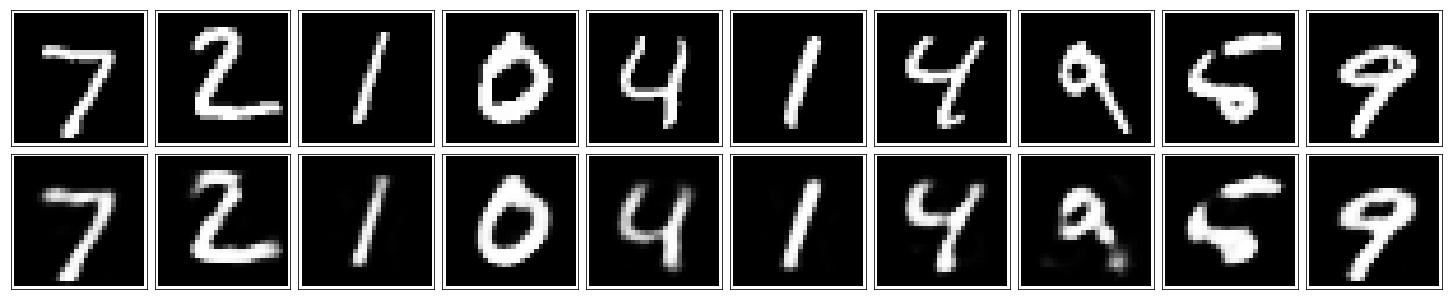

In [48]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
reconstructed, compressed = sess.run([decoded, encoded], feed_dict={inputs_: in_imgs})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)

In [49]:
sess.close()

## Up Next

We're dealing with images here, so we can (usually) get better performance using convolution layers. So, next we'll build a better autoencoder with convolutional layers.

In practice, autoencoders aren't actually better at compression compared to typical methods like JPEGs and MP3s. But, they are being used for noise reduction, which you'll also build.